# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# **1. Weather_forecast Dataset**

## EDA

In [ ]:
df = pd.read_csv('weather_forecast.csv')
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [ ]:
df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.describe

<bound method NDFrame.describe of      Outlook Temperature Humidity   Windy Play
0      Sunny         Hot     High    Weak   No
1      Sunny         Hot     High  Strong   No
2   Overcast         Hot     High    Weak  Yes
3       Rain        Mild     High    Weak  Yes
4       Rain        Cool   Normal    Weak  Yes
5       Rain        Cool   Normal  Strong   No
6   Overcast        Cool   Normal  Strong  Yes
7      Sunny        Mild     High    Weak   No
8      Sunny        Cool   Normal    Weak  Yes
9       Rain        Mild   Normal    Weak  Yes
10     Sunny        Mild   Normal  Strong  Yes
11  Overcast        Mild     High  Strong  Yes
12  Overcast         Hot   Normal    Weak  Yes
13      Rain        Mild     High  Strong   No>

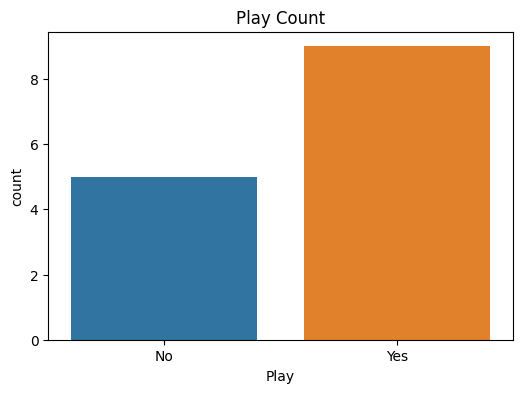

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Play', data=df)
plt.title('Play Count')
plt.show()

Text(0.5, 1.0, 'Outlook vs Play')

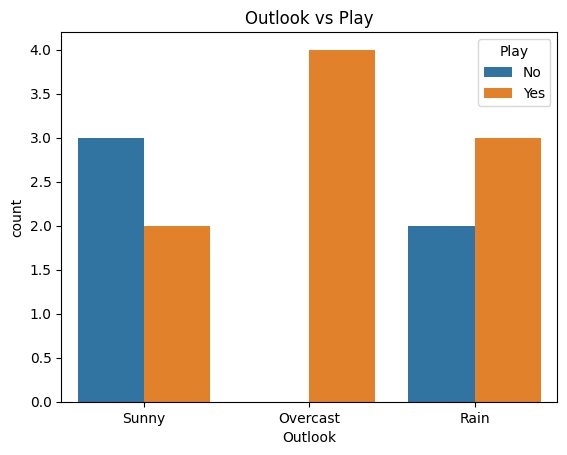

In [ ]:
plt.subplot(1, 1, 1)
sns.countplot(x='Outlook', hue='Play', data=df)
plt.title('Outlook vs Play')

Text(0.5, 1.0, 'Temperature vs Play')

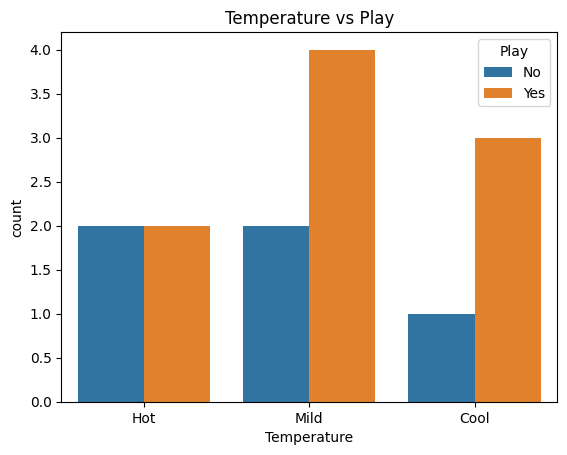

In [ ]:
plt.subplot(1, 1, 1)
sns.countplot(x='Temperature', hue='Play', data=df)
plt.title('Temperature vs Play')

Text(0.5, 1.0, 'Humidity vs Play')

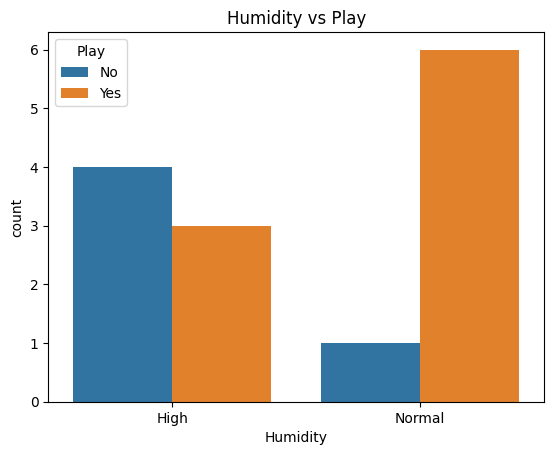

In [ ]:
plt.subplot(1, 1, 1)
sns.countplot(x='Humidity', hue='Play', data=df)
plt.title('Humidity vs Play')

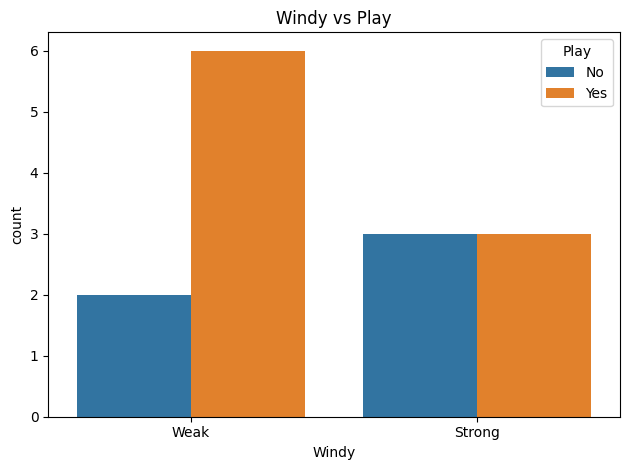

In [ ]:
plt.subplot(1, 1, 1)
sns.countplot(x='Windy', hue='Play', data=df)
plt.title('Windy vs Play')
plt.tight_layout()
plt.show()

## KNN

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

lb = LabelEncoder()
df['Outlook'] = lb.fit_transform(df['Outlook'])
df['Temperature'] = lb.fit_transform(df['Temperature'])
df['Humidity'] = lb.fit_transform(df['Humidity'])
df['Windy'] = lb.fit_transform(df['Windy'])
df['Play'] = lb.fit_transform(df['Play'])

In [ ]:
X = df.drop(columns=['Play'])
y = df['Play']

In [ ]:
X

,Outlook,Temperature,Humidity,Windy
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [ ]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11, 4)
(11,)
(3, 4)
(3,)


In [ ]:
param_grid_knn = {'n_neighbors': range(1, 21), 'p': [1, 2]}
knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21), 'p': [1, 2]})

In [ ]:
best_n_neighbors = grid_search_knn.best_params_['n_neighbors']
best_p = grid_search_knn.best_params_['p']

In [ ]:
clf = KNeighborsClassifier(n_neighbors=best_n_neighbors, p=best_p)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

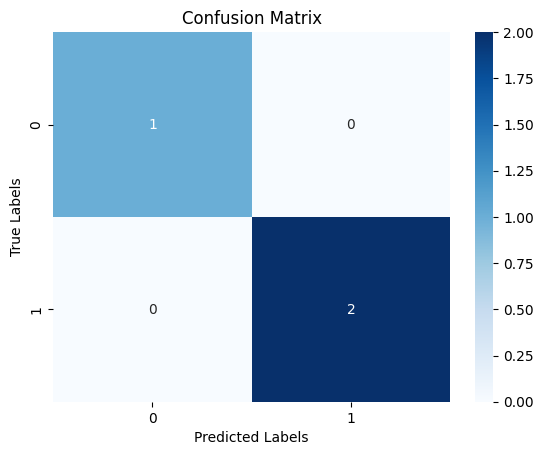

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(cm)

[[1 0]
 [0 2]]


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
best_accuracy = clf.score(x_test, y_test)
print("KNN Best Accuracy:", best_accuracy)

KNN Best Accuracy: 1.0


## Naive Bayes

In [ ]:
lb = LabelEncoder()
df['Temperature'] = lb.fit_transform(df['Temperature'])
df['Humidity'] = lb.fit_transform(df['Humidity'])
df['Windy'] = lb.fit_transform(df['Windy'])
df['Play'] = lb.fit_transform(df['Play'])

X = df.drop(columns=['Play'])
y = df['Play']

In [ ]:
X

,Outlook,Temperature,Humidity,Windy
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [ ]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11, 4)
(11,)
(3, 4)
(3,)


In [ ]:
param_grid_mnb = {}
mnb = MultinomialNB()
grid_search_mnb = GridSearchCV(mnb, param_grid_mnb, cv=5)
grid_search_mnb.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), param_grid={})

In [ ]:
param_grid_bnb = {'alpha': [0.1, 0.5, 1.0]}
bnb = BernoulliNB()
grid_search_bnb = GridSearchCV(bnb, param_grid_bnb, cv=5)
grid_search_bnb.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0]})

In [ ]:
best_alpha_bnb = grid_search_bnb.best_params_['alpha']

In [ ]:
clf1 = MultinomialNB()
clf1.fit(x_train, y_train)

MultinomialNB()

In [ ]:
clf2 = BernoulliNB(alpha=best_alpha_bnb)
clf2.fit(x_train, y_train)

BernoulliNB(alpha=0.1)

In [ ]:
pred1 = clf1.predict(x_test)

pred2 = clf2.predict(x_test)

In [ ]:
cm1 = confusion_matrix(y_test, pred1)
cr1 = classification_report(y_test, pred1)

cm2 = confusion_matrix(y_test, pred2)
cr2 = classification_report(y_test, pred2)

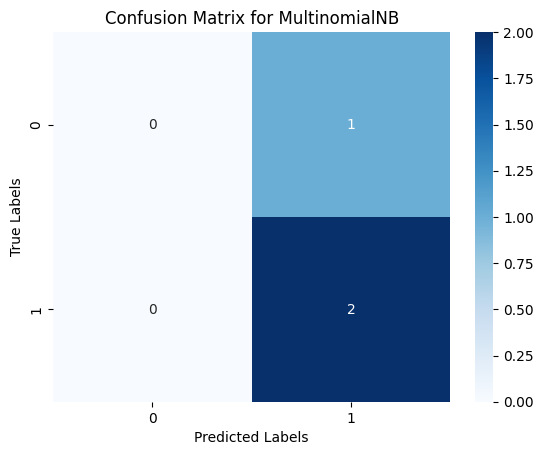

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



In [ ]:
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MultinomialNB')
plt.show()

print(cr1)

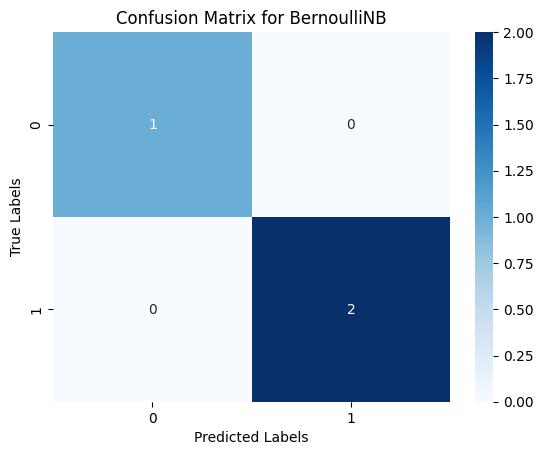

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for BernoulliNB')
plt.show()

print(cr2)

In [ ]:
accuracy1 = clf1.score(x_test, y_test)
accuracy2 = clf2.score(x_test, y_test)

In [ ]:
print("Accuracy for MultinomialNB:", accuracy1)
print("Accuracy for BernoulliNB:", accuracy2)

Accuracy for MultinomialNB: 0.6666666666666666
Accuracy for BernoulliNB: 1.0


## SVM

In [ ]:
x = df.drop(['Play'],axis = 1)
y = df['Play']

In [ ]:
x

,Outlook,Temperature,Humidity,Windy
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [ ]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11, 4)
(11,)
(3, 4)
(3,)


In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=42)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.66666667 0.66666667 0.66666667 0.66666667 1.        ]
Mean score: 0.7333333333333333


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [x/100 for x in range(10,200,5)],
    'max_iter': [x for x in range(1000,5000,1000)],
    'penalty': ['l1','l2']
    # random_state : [x for x in range(1,100)]
}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

In [ ]:
bestest_model = LinearSVC(C=0.3, max_iter=10000)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(bestest_model, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [1.         0.66666667 0.66666667 0.66666667 1.        ]
Mean score: 0.7999999999999999


## DT

In [ ]:
x = df.drop('Play',axis = 1)
y = df['Play']

for col in x.columns:
  x[col] = LabelEncoder().fit_transform(x[col])

In [ ]:
lb = LabelEncoder()
y = lb.fit_transform(y)

In [ ]:
x

,Outlook,Temperature,Humidity,Windy
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [ ]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11, 4)
(11,)
(3, 4)
(3,)


In [ ]:
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



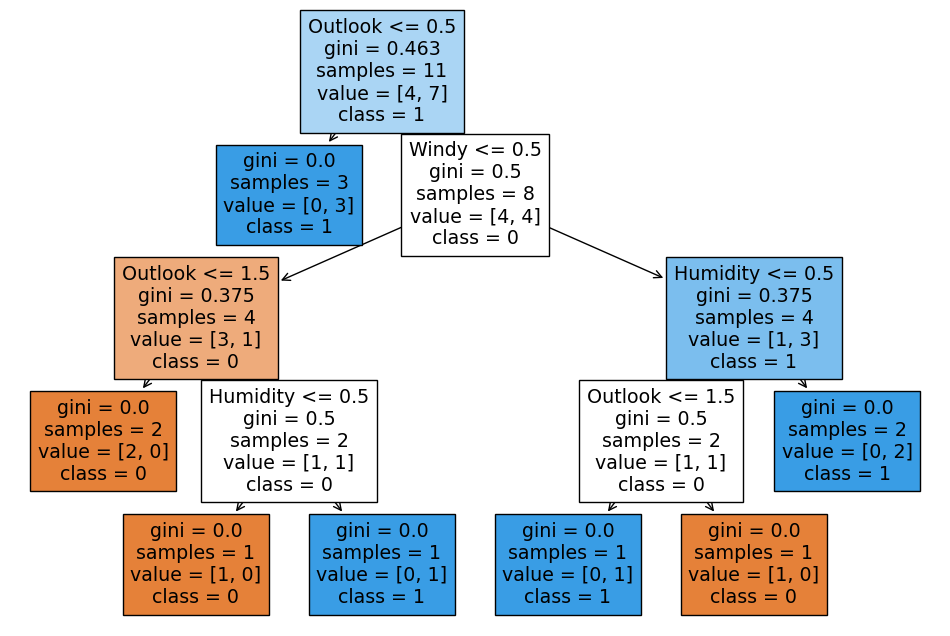

In [ ]:
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=x.columns, class_names= [str(x) for x in list(lb.classes_)], filled=True)
plt.show()

# **2. Weather Dataset**

## EDA

In [ ]:
df1 = pd.read_csv("weather.csv")
df1

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-12,0.0,12.8,5.0,4.7,drizzle
1,02-01-12,10.9,10.6,2.8,4.5,rain
2,03-01-12,0.8,11.7,7.2,2.3,rain
3,04-01-12,20.3,12.2,5.6,4.7,rain
4,05-01-12,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,27-12-15,8.6,4.4,1.7,2.9,rain
1457,28-12-15,1.5,5.0,1.7,1.3,rain
1458,29-12-15,0.0,7.2,0.6,2.6,fog
1459,30-12-15,0.0,5.6,-1.0,3.4,sun


In [ ]:
df1.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-12,0.0,12.8,5.0,4.7,drizzle
1,02-01-12,10.9,10.6,2.8,4.5,rain
2,03-01-12,0.8,11.7,7.2,2.3,rain
3,04-01-12,20.3,12.2,5.6,4.7,rain
4,05-01-12,1.3,8.9,2.8,6.1,rain


In [ ]:
df1.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


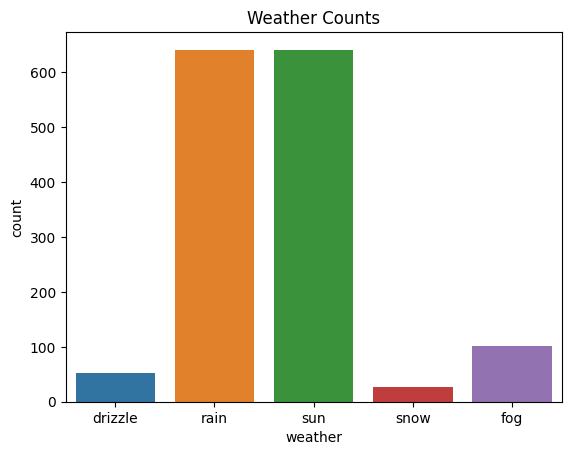

In [ ]:
sns.countplot(data=df1, x='weather')
plt.title('Weather Counts')
plt.show()

In [ ]:
df1.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


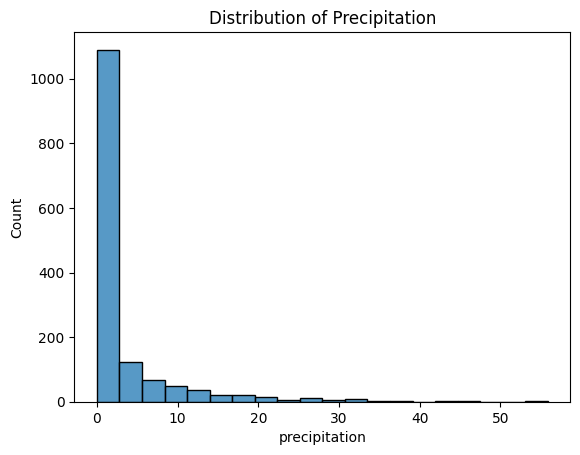

In [ ]:
sns.histplot(data=df1, x='precipitation', bins=20)
plt.title('Distribution of Precipitation')
plt.show()

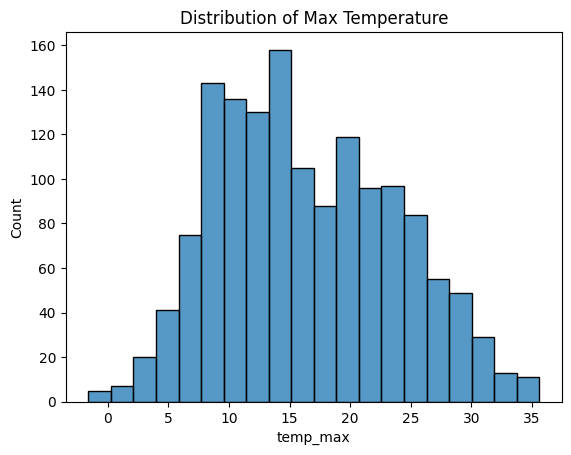

In [ ]:
sns.histplot(data=df1, x='temp_max', bins=20)
plt.title('Distribution of Max Temperature')
plt.show()

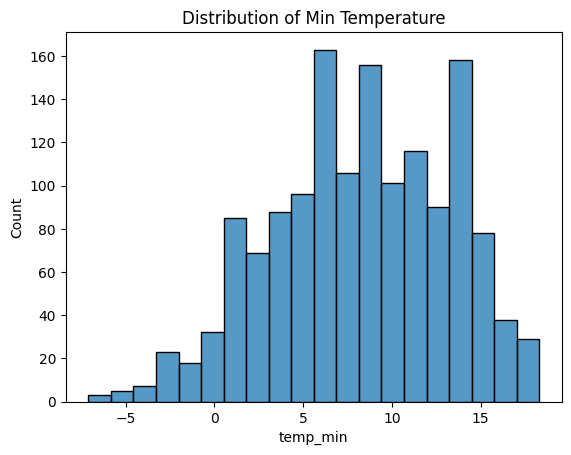

In [ ]:
sns.histplot(data=df1, x='temp_min', bins=20)
plt.title('Distribution of Min Temperature')
plt.show()


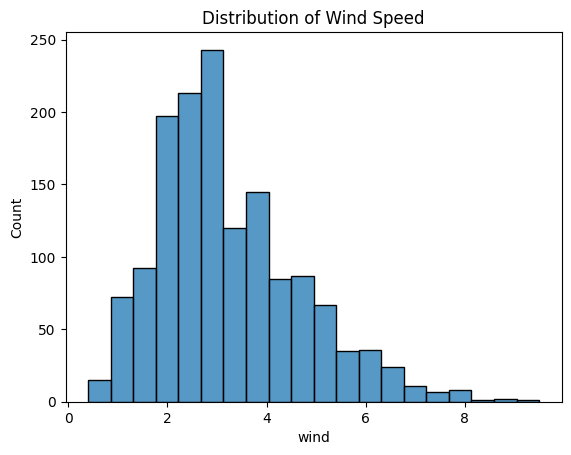

In [ ]:
sns.histplot(data=df1, x='wind', bins=20)
plt.title('Distribution of Wind Speed')
plt.show()

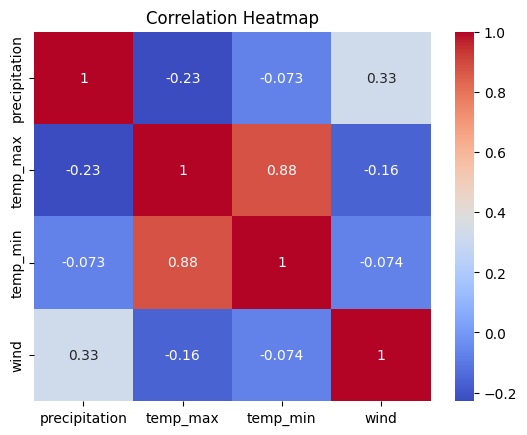

In [ ]:
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

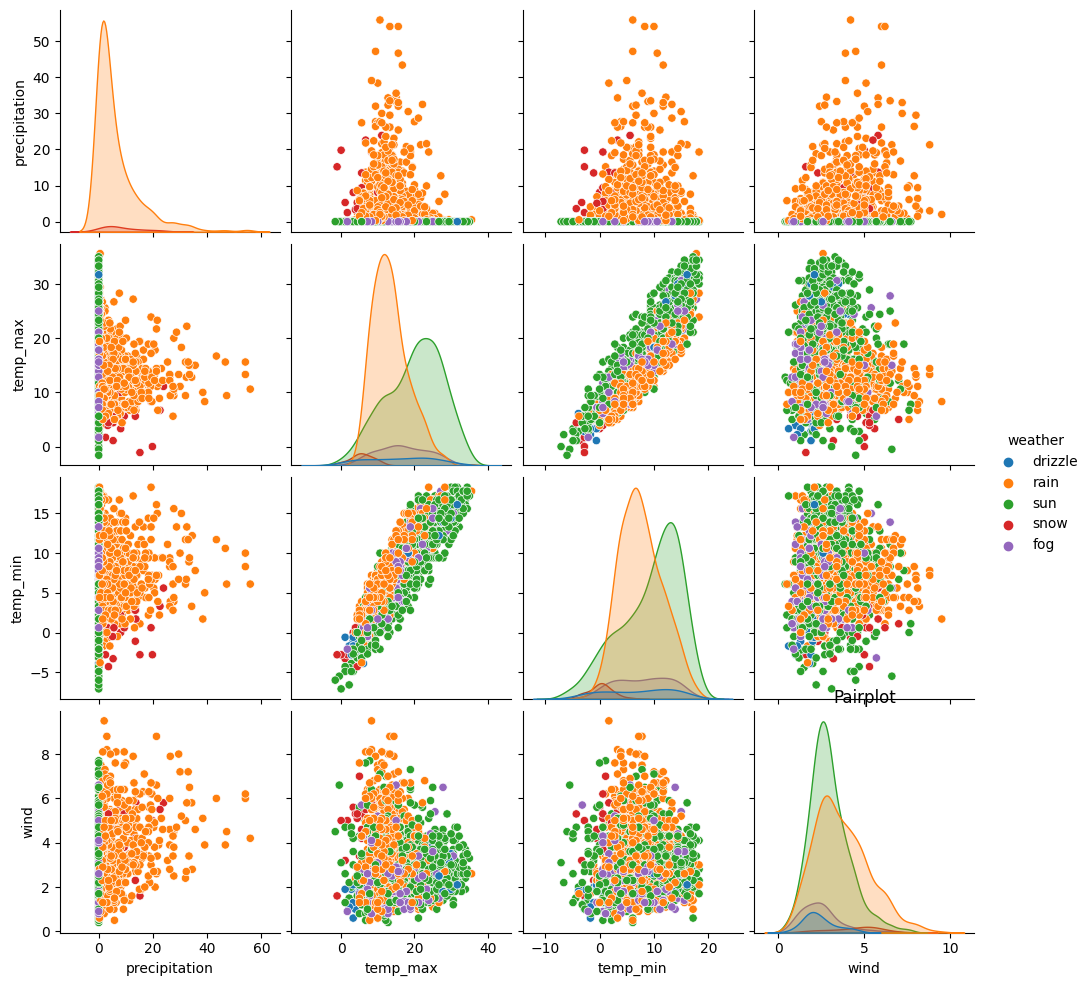

In [ ]:
sns.pairplot(df1, hue='weather', diag_kind='kde')
plt.title("Pairplot")
plt.show()

## KNN

In [ ]:
X = df1.drop(columns=['weather', 'date'])
y = df1['weather']

In [ ]:
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [ ]:
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1168, 4)
(1168,)
(293, 4)
(293,)


In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, p=1)
clf.fit(x_train, y_train)

KNeighborsClassifier(p=1)

In [ ]:
y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [ ]:
print(cm)

[[  1   0   0   0   8]
 [  1   6   1   0  17]
 [  0   1 105   0  14]
 [  0   1   4   0   3]
 [  1   4   6   0 120]]


In [ ]:
print(cr)

              precision    recall  f1-score   support

     drizzle       0.33      0.11      0.17         9
         fog       0.50      0.24      0.32        25
        rain       0.91      0.88      0.89       120
        snow       0.00      0.00      0.00         8
         sun       0.74      0.92      0.82       131

    accuracy                           0.79       293
   macro avg       0.50      0.43      0.44       293
weighted avg       0.75      0.79      0.76       293



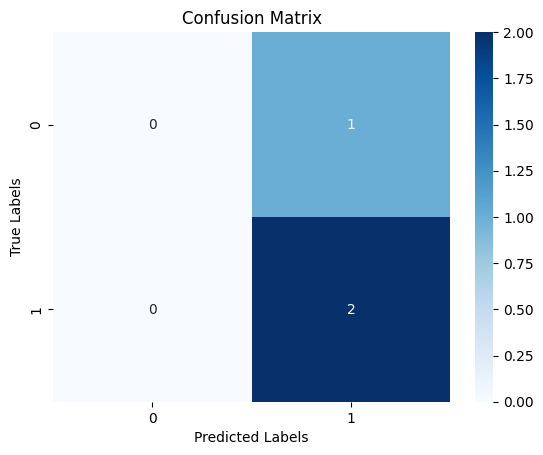

In [ ]:
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = clf.score(x_test, y_test)
print(f"Best KNN Accuracy: {accuracy:.2f}")

Best KNN Accuracy: 0.79


## Naive Bayes

**Bernoulli**

In [ ]:
X = df1.drop("weather", axis=1)
y = df1["weather"]

In [ ]:
X

,date,precipitation,temp_max,temp_min,wind
0,0,0.0,12.8,5.0,4.7
1,48,10.9,10.6,2.8,4.5
2,96,0.8,11.7,7.2,2.3
3,144,20.3,12.2,5.6,4.7
4,192,1.3,8.9,2.8,6.1
...,...,...,...,...,...
1456,1295,8.6,4.4,1.7,2.9
1457,1343,1.5,5.0,1.7,1.3
1458,1388,0.0,7.2,0.6,2.6
1459,1432,0.0,5.6,-1.0,3.4


In [ ]:
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [ ]:
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = lb.fit_transform(X[col])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1168, 5)
(1168,)
(293, 5)
(293,)


In [ ]:
clf = BernoulliNB()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

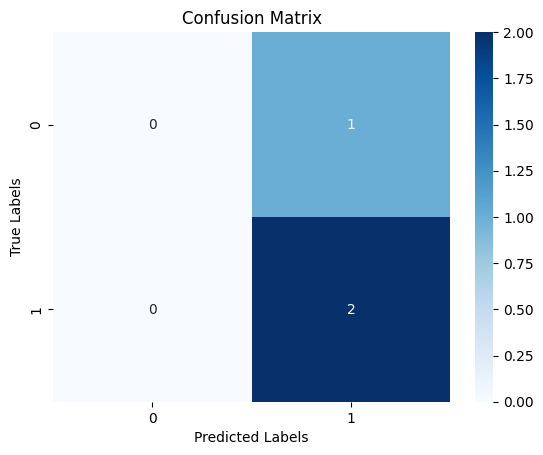

In [ ]:
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print(cm)

[[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  0   0 112   0   8]
 [  0   0   8   0   0]
 [  0   0   0   0 131]]


In [ ]:
print(cr)

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.93      0.93      0.93       120
        snow       0.00      0.00      0.00         8
         sun       0.76      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.34      0.39      0.36       293
weighted avg       0.72      0.83      0.77       293



In [ ]:
accuracy = clf.score(x_test, y_test)
print("Accuracy for BernoulliNB:", accuracy)

Accuracy for BernoulliNB: 0.8293515358361775


**GaussianNB**

In [ ]:
lb = LabelEncoder()
df1['weather'] = lb.fit_transform(df1['weather'])

X = df1.drop("weather", axis=1)
y = df1["weather"]

In [ ]:
X

,date,precipitation,temp_max,temp_min,wind
0,0,0.0,12.8,5.0,4.7
1,48,10.9,10.6,2.8,4.5
2,96,0.8,11.7,7.2,2.3
3,144,20.3,12.2,5.6,4.7
4,192,1.3,8.9,2.8,6.1
...,...,...,...,...,...
1456,1295,8.6,4.4,1.7,2.9
1457,1343,1.5,5.0,1.7,1.3
1458,1388,0.0,7.2,0.6,2.6
1459,1432,0.0,5.6,-1.0,3.4


In [ ]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64

In [ ]:
# Convert categorical variables to numerical labels using label encoding

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = lb.fit_transform(X[col])

X = pd.get_dummies(X, drop_first=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1168, 5)
(1168,)
(293, 5)
(293,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

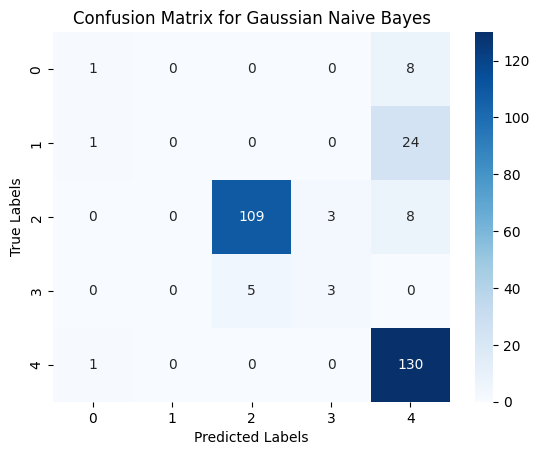

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()

In [ ]:
print(cm)

[[  1   0   0   0   8]
 [  1   0   0   0  24]
 [  0   0 109   3   8]
 [  0   0   5   3   0]
 [  1   0   0   0 130]]


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.00      0.00      0.00        25
           2       0.96      0.91      0.93       120
           3       0.50      0.38      0.43         8
           4       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.51      0.48      0.48       293
weighted avg       0.76      0.83      0.78       293



In [ ]:
accuracy = clf.score(x_test, y_test)
print("Accuracy for Gaussian Naive Bayes:", accuracy)

Accuracy for Gaussian Naive Bayes: 0.8293515358361775


## SVM

In [ ]:
X = df1.drop(columns=['weather', 'date'])
y = df1['weather']

In [ ]:
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [ ]:
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1168, 4)
(1168,)
(293, 4)
(293,)


In [ ]:
clf = LinearSVC(random_state=42)
clf.fit(x_train, y_train)

pred = clf.predict(x_test)

In [ ]:
cr = classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.90      0.93      0.91       120
        snow       0.00      0.00      0.00         8
         sun       0.76      0.97      0.85       131

    accuracy                           0.82       293
   macro avg       0.33      0.38      0.35       293
weighted avg       0.70      0.82      0.75       293



In [ ]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.82593857 0.76369863 0.82534247 0.82876712 0.82876712]
Mean score: 0.8145027818037309


In [ ]:
parameters = {
    'C': [x / 100 for x in range(10, 200, 5)],
    'max_iter': [x for x in range(1000, 5000, 1000)],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
# grid_search.fit(x_train, y_train)
                                          # It takes too much time to run
# best_model = grid_search.best_estimator_

In [ ]:
best_model_scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')

In [ ]:
print("Cross-validation scores (Best Model):", best_model_scores)
print("Mean score (Best Model):", best_model_scores.mean())

Cross-validation scores (Best Model): [0.83276451 0.86643836 0.82876712 0.8390411  0.85958904]
Mean score (Best Model): 0.8453200243115621


## DT

In [ ]:
df1 = df1.drop('date',axis =1)
df1.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [ ]:
lb = LabelEncoder()
df1['weather'] = lb.fit_transform(df1['weather'])

In [ ]:
df1.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
x = df1.drop(['weather'],axis = 1)
y = df1['weather']

In [ ]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [ ]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.7337884  0.77739726 0.74315068 0.76369863 0.81506849]
Mean score: 0.7666206928795176


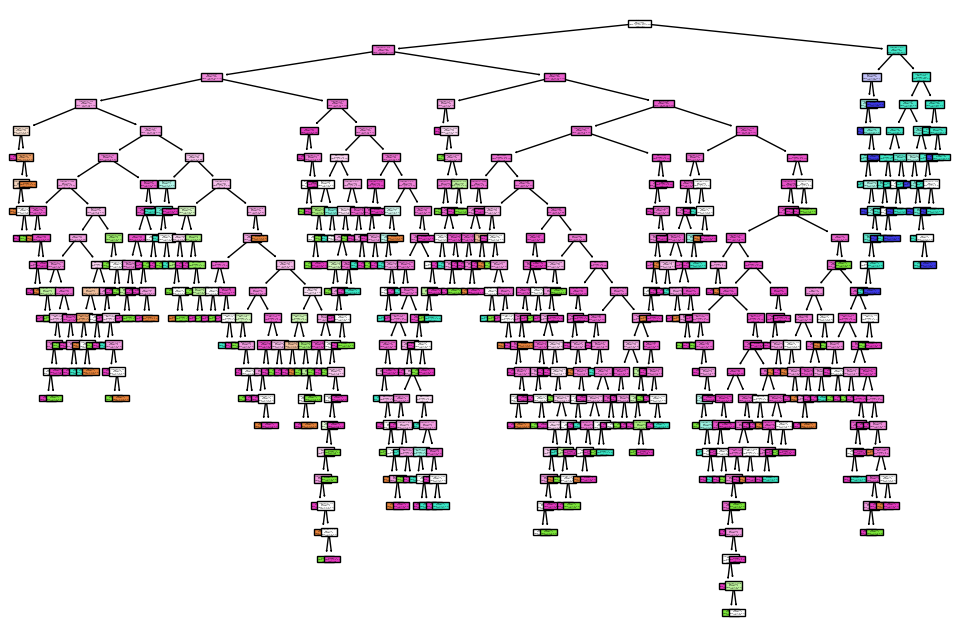

In [ ]:
from sklearn import tree
clf.fit(x,y)
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=x.columns, class_names= [str(x) for x in list(lb.classes_)], filled=True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [x for x in range(2,10)]
}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1,scoring = 'accuracy',cv=5)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

In [ ]:
print(best_model)

DecisionTreeClassifier(max_depth=3)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(best_model, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.83276451 0.86986301 0.84931507 0.8390411  0.87328767]
Mean score: 0.8528542708869045


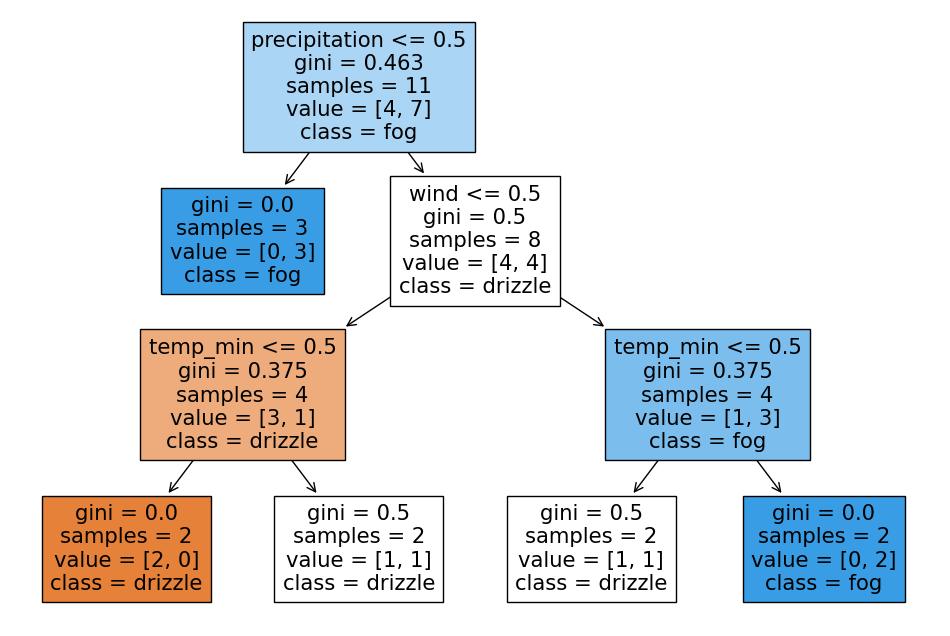

In [ ]:
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(best_model, feature_names=x.columns, class_names= [str(x) for x in list(lb.classes_)], filled=True)
plt.show()

# **3. Bank Dataset**

## EDA

In [ ]:
df2 = pd.read_csv("bank.csv")
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

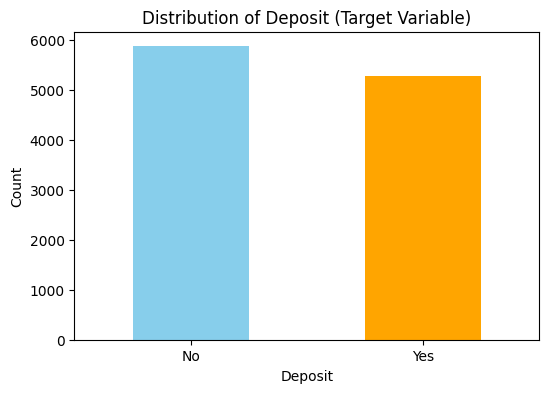

In [ ]:
plt.figure(figsize=(6, 4))
df2['deposit'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribution of Deposit (Target Variable)")
plt.xlabel("Deposit")
plt.ylabel("Count")
plt.xticks([0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

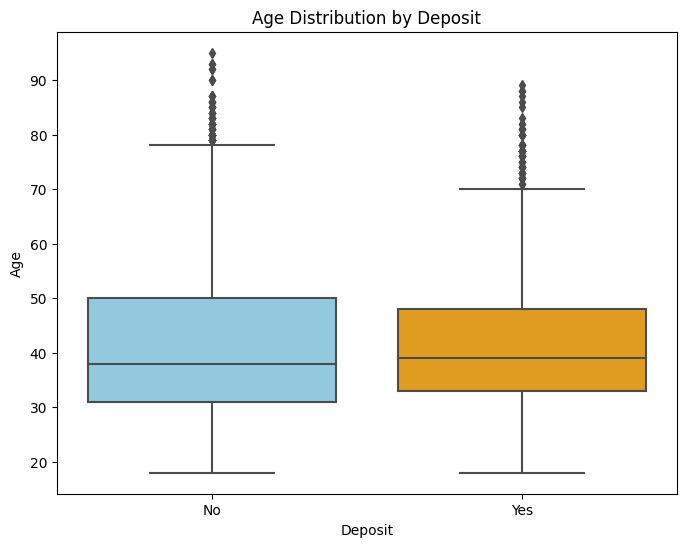

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='age', data=df2, palette=['skyblue', 'orange'])
plt.title("Age Distribution by Deposit")
plt.xlabel("Deposit")
plt.ylabel("Age")
plt.xticks([0, 1], labels=['No', 'Yes'])
plt.show()

## KNN

In [ ]:
lb = LabelEncoder()
df2['deposit'] = lb.fit_transform(df2['deposit'])

X = df2.drop("deposit", axis=1)
y = df2["deposit"]

In [ ]:
X

,age,balance,day,duration,campaign,pdays,previous,0,1,2,...,25,26,27,28,29,30,31,32,33,34
0,59,2343,5,1042,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,2,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,733,16,83,4,-1,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,29,19,156,2,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,8,9,2,172,5,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:
## Convert categorical variables to numerical labels
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X_categorical_encoded = pd.DataFrame(onehot_encoder.fit_transform(X[categorical_cols]))
X = pd.concat([X.drop(categorical_cols, axis=1), X_categorical_encoded], axis=1)

X.columns = X.columns.astype(str)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1168, 4)
(8929,)
(293, 4)
(2233,)


In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, p=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

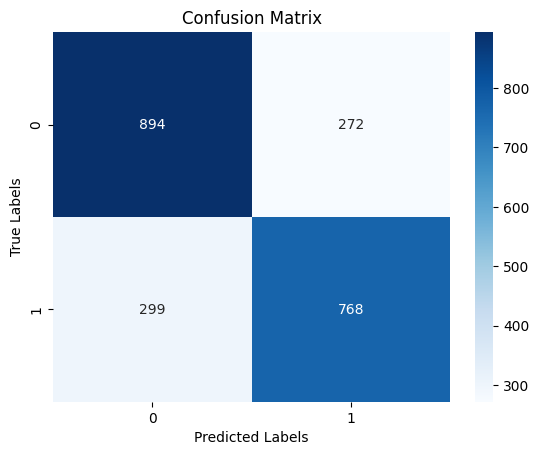

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(cm)

[[894 272]
 [299 768]]


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1166
           1       0.74      0.72      0.73      1067

    accuracy                           0.74      2233
   macro avg       0.74      0.74      0.74      2233
weighted avg       0.74      0.74      0.74      2233



In [ ]:
accuracy = clf.score(X_test, y_test)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.7442901925660547


## Naive Bayes

**Bernoulli**

In [ ]:
lb = LabelEncoder()
df2['deposit'] = lb.fit_transform(df['deposit'])

X = df2.drop("deposit", axis=1)
y = df2["deposit"]

In [ ]:
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = lb.fit_transform(X[col])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8929, 16)
(8929,)
(2233, 16)
(2233,)


In [ ]:
clf = BernoulliNB()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

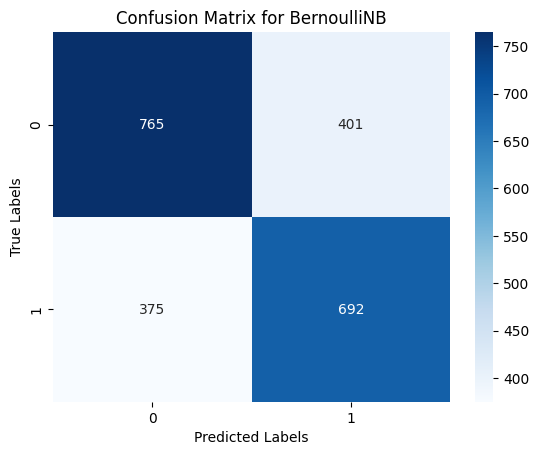

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for BernoulliNB')
plt.show()

In [ ]:
print(cm)

[[765 401]
 [375 692]]


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1166
           1       0.63      0.65      0.64      1067

    accuracy                           0.65      2233
   macro avg       0.65      0.65      0.65      2233
weighted avg       0.65      0.65      0.65      2233



In [ ]:
accuracy = clf.score(x_test, y_test)
print("Accuracy for BernoulliNB:", accuracy)

Accuracy for BernoulliNB: 0.6524854455888939


**Gaussian**

In [ ]:
lb = LabelEncoder()
df2['deposit'] = lb.fit_transform(df2['deposit'])

X = df2.drop("deposit", axis=1)
y = df2["deposit"]

In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:
## Convert categorical variables to numerical labels using label encoding

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = lb.fit_transform(X[col])

X = pd.get_dummies(X, drop_first=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8929, 16)
(8929,)
(2233, 16)
(2233,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

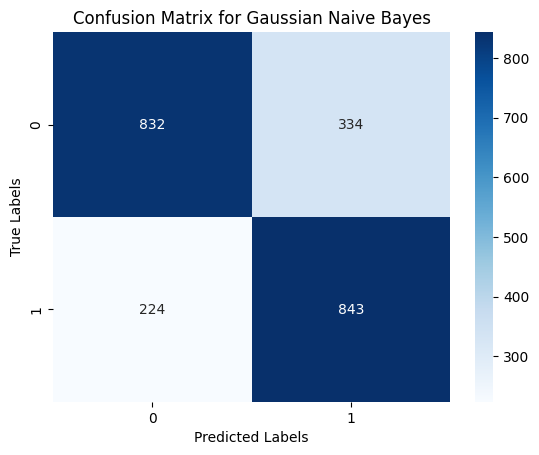

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()

In [ ]:
print(cm)

[[832 334]
 [224 843]]


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1166
           1       0.72      0.79      0.75      1067

    accuracy                           0.75      2233
   macro avg       0.75      0.75      0.75      2233
weighted avg       0.75      0.75      0.75      2233



In [ ]:
accuracy = clf.score(x_test, y_test)
print("Accuracy for Gaussian Naive Bayes:", accuracy)

Accuracy for Gaussian Naive Bayes: 0.7501119570085087


## SVM

In [ ]:
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

X = df.drop("deposit", axis=1)
y = df["deposit"]

In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8929, 16)
(8929,)
(2233, 16)
(2233,)


In [ ]:
clf = LinearSVC(random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

cr = classification_report(y_test, y_pred)

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.68      0.75      1166
           1       0.71      0.85      0.77      1067

    accuracy                           0.76      2233
   macro avg       0.77      0.77      0.76      2233
weighted avg       0.78      0.76      0.76      2233



In [ ]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.74205105 0.51097179 0.60125448 0.53225806 0.6733871 ]
Mean score: 0.6119844961613594


In [ ]:
parameters = {
    'C': [x/100 for x in range(10, 200, 5)],
    'max_iter': [x for x in range(1000, 5000, 1000)],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
# grid_search.fit(x_train, y_train)
                                             # Take too much time to run
# best_model = grid_search.best_estimator_

In [ ]:
best_model

LogisticRegression(C=1.5, max_iter=1000)

In [ ]:
scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
print("Mean score with best model:", scores.mean())

Mean score with best model: 0.7867775562714383


## DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV

label_encoder = LabelEncoder()
df2['deposit'] = label_encoder.fit_transform(df2['deposit'])

In [ ]:
X = df2.drop("deposit", axis=1)
y = df2["deposit"]

In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:
for col in X.columns:
    X[col] = LabelEncoder().fit_transform(X[col])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

In [ ]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

In [ ]:
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.76085983 0.78011644 0.77777778 0.77329749 0.76971326]
Mean score: 0.7723529591160292


In [ ]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

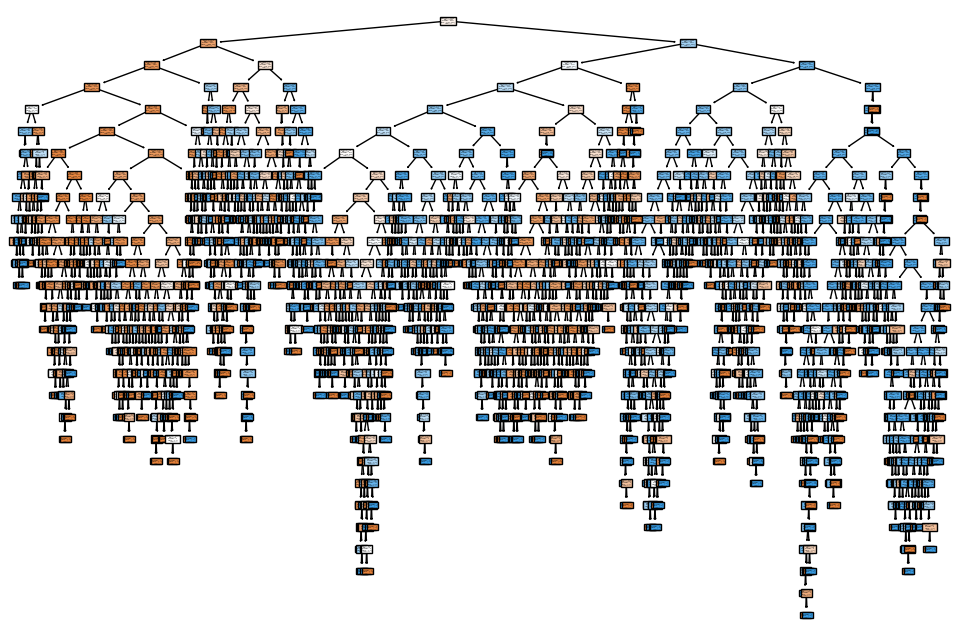

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(x) for x in list(label_encoder.classes_)], filled=True)
plt.show()

In [ ]:
parameters = {
    'max_depth': [x for x in range(2, 10)]
}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')

In [ ]:
print("Cross-validation scores for the best model:", scores)
print("Mean score for the best model:", scores.mean())

Cross-validation scores for the best model: [0.80922526 0.83116883 0.82078853 0.83333333 0.81496416]
Mean score for the best model: 0.8218960220350654


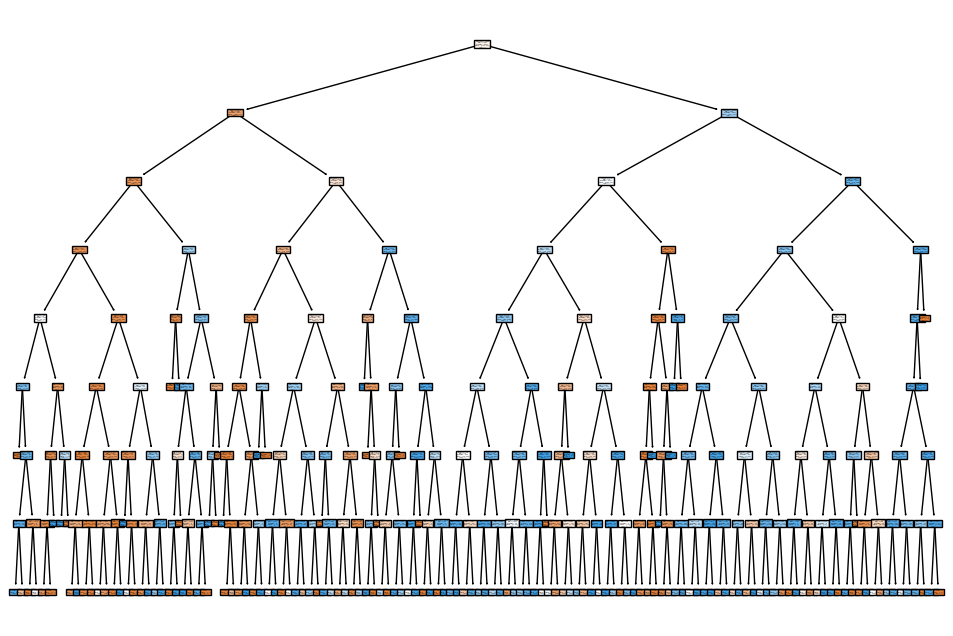

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(best_model, feature_names=X.columns, class_names=[str(x) for x in list(label_encoder.classes_)], filled=True)
plt.show()

In [ ]:
accuracy_test = best_model.score(x_test, y_test)
print("Accuracy on the test set:", accuracy_test)

# **4. Train Dataset**

## EDA

In [ ]:
df3 = pd.read_csv('train.csv')
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


In [ ]:
df3.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df3['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
sex_survived = pd.crosstab(df3['Sex'], df3['Survived'])
print(sex_survived)

Survived    0    1
Sex               
female     81  233
male      468  109


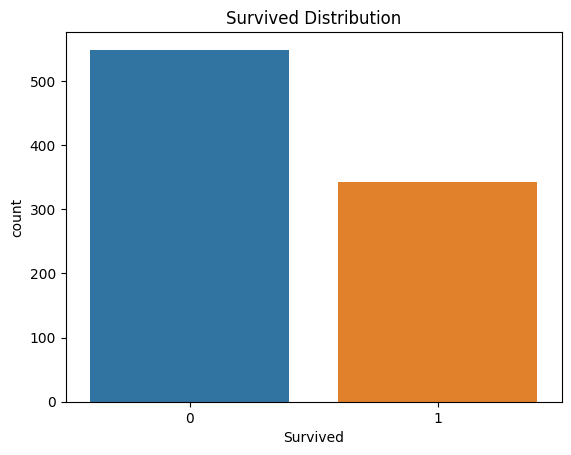

In [ ]:
sns.countplot(x='Survived', data=df3)
plt.title('Survived Distribution')
plt.show()

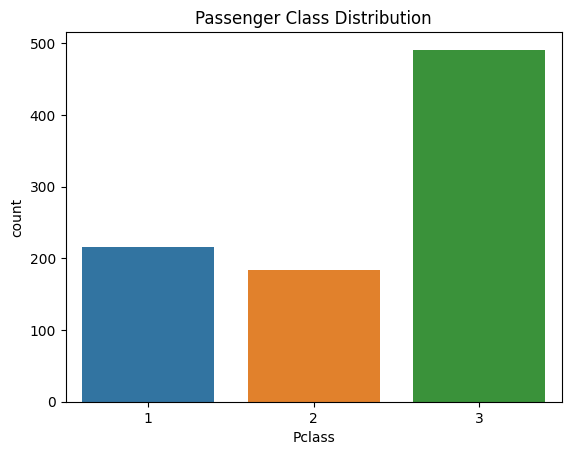

In [ ]:
sns.countplot(x='Pclass', data=df3)
plt.title('Passenger Class Distribution')
plt.show()

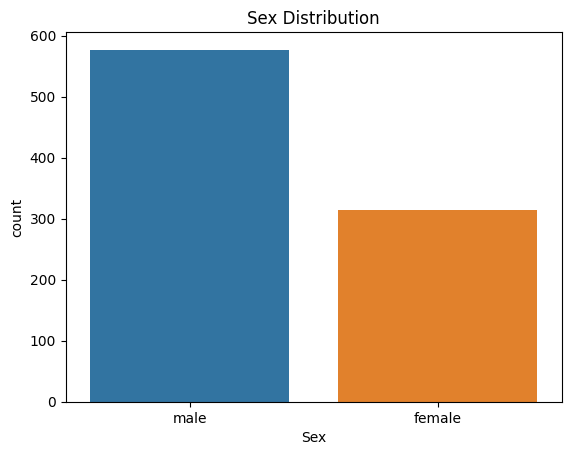

In [ ]:
sns.countplot(x='Sex', data=df3)
plt.title('Sex Distribution')
plt.show()

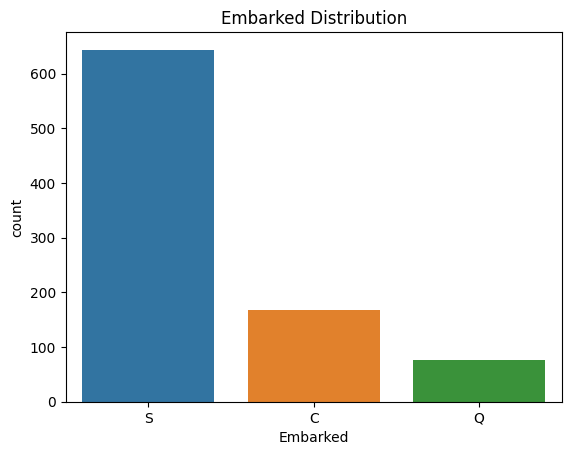

In [ ]:
sns.countplot(x='Embarked', data=df3)
plt.title('Embarked Distribution')
plt.show()

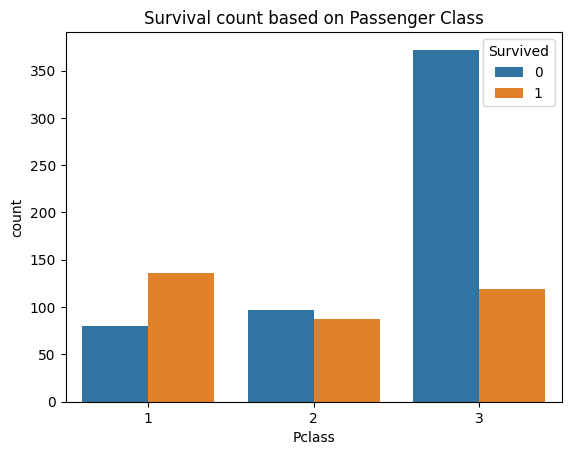

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df3)
plt.title('Survival count based on Passenger Class')
plt.show()

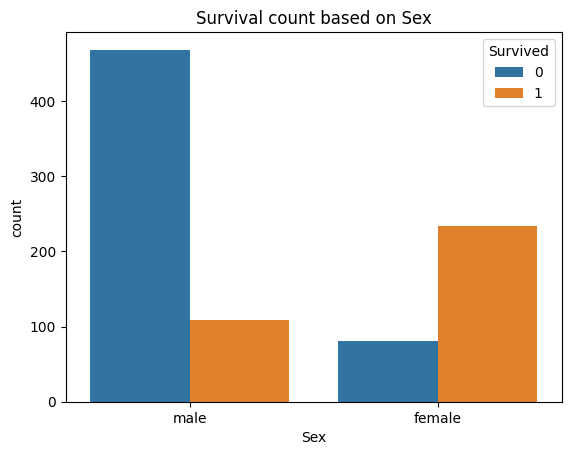

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df3)
plt.title('Survival count based on Sex')
plt.show()

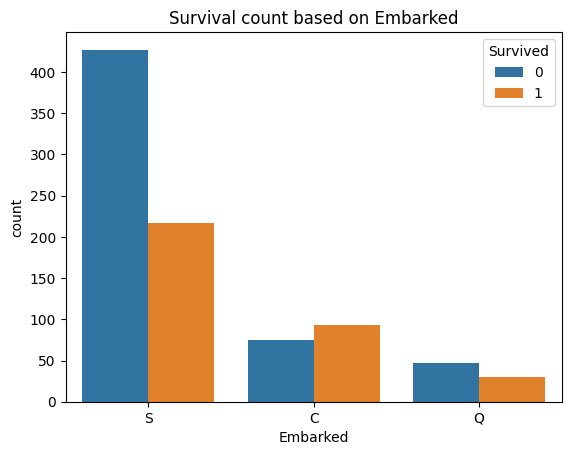

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=df3)
plt.title('Survival count based on Embarked')
plt.show()

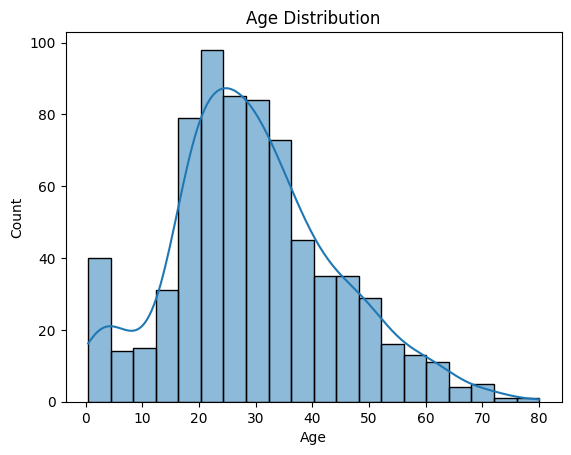

In [ ]:
sns.histplot(df3['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

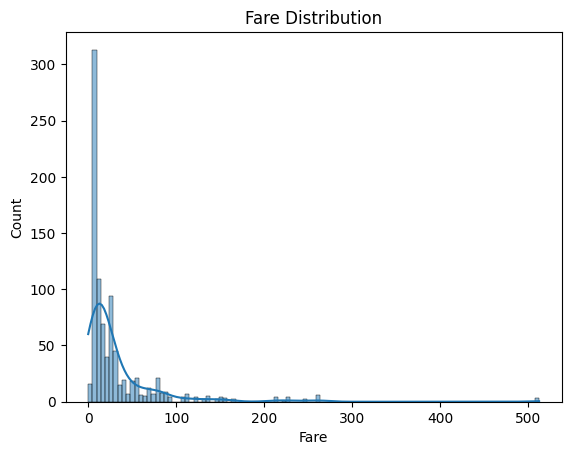

In [ ]:
sns.histplot(df3['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

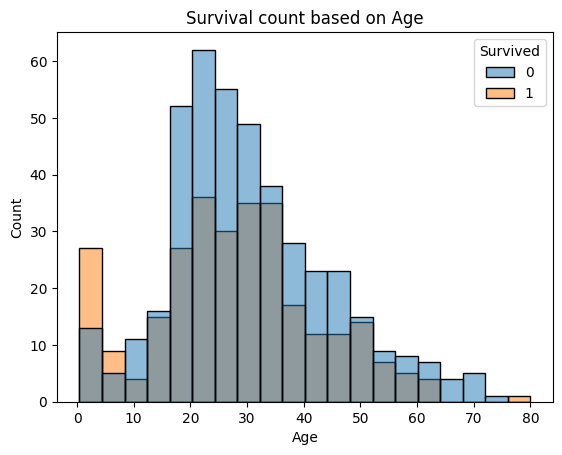

In [ ]:
sns.histplot(x='Age', hue='Survived', data=df3)
plt.title('Survival count based on Age')
plt.show()

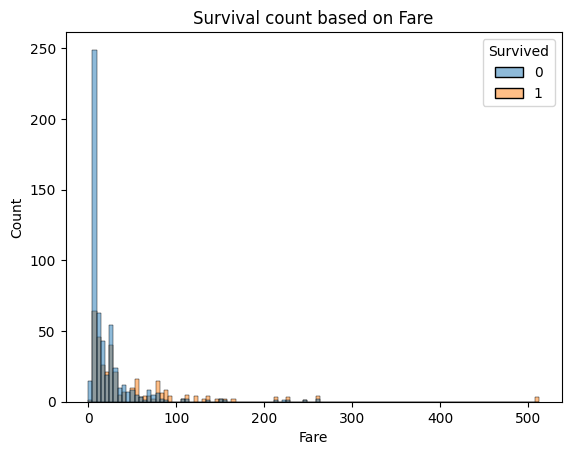

In [ ]:
sns.histplot(x='Fare', hue='Survived', data=df3)
plt.title('Survival count based on Fare')
plt.show()

## KNN

In [ ]:
df3['Age'].fillna(df3['Age'].mean(), inplace=True)

lb = LabelEncoder()
df3['Sex'] = lb.fit_transform(df3['Sex'].astype(str))

lb2 = LabelEncoder()
df3['Embarked'] = lb2.fit_transform(df3['Embarked'].astype(str))

In [ ]:
X = df3.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df3['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
param_grid = {'n_neighbors': range(1, 11)}

knn = KNeighborsClassifier()

In [ ]:
grid_search_knn = GridSearchCV(knn, param_grid, cv=5)
grid_search_knn.fit(X, y)

best_knn = grid_search_knn.best_estimator_
knn_accuracy = grid_search_knn.best_score_

acc = knn_accuracy

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, p=1)
clf.fit(X, y)

y_pred = clf.predict(X)

cr = classification_report(y, y_pred)
cm = confusion_matrix(y, y_pred)

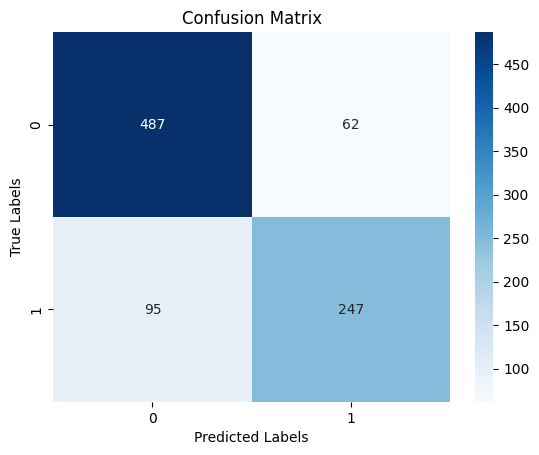

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(cm)

[[487  62]
 [ 95 247]]


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       549
           1       0.80      0.72      0.76       342

    accuracy                           0.82       891
   macro avg       0.82      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.8293515358361775


## Naive Bayes

In [ ]:
lb2 = LabelEncoder()
df3['Embarked'] = lb2.fit_transform(df3['Embarked'].astype(str))

X = df3.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df3['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [ ]:
clf1 = MultinomialNB()
clf2 = BernoulliNB()

clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)

BernoulliNB()

In [ ]:
pred1 = clf1.predict(x_test)
pred2 = clf2.predict(x_test)

cm1 = confusion_matrix(y_test, pred1)
cr1 = classification_report(y_test, pred1)

cm2 = confusion_matrix(y_test, pred2)
cr2 = classification_report(y_test, pred2)

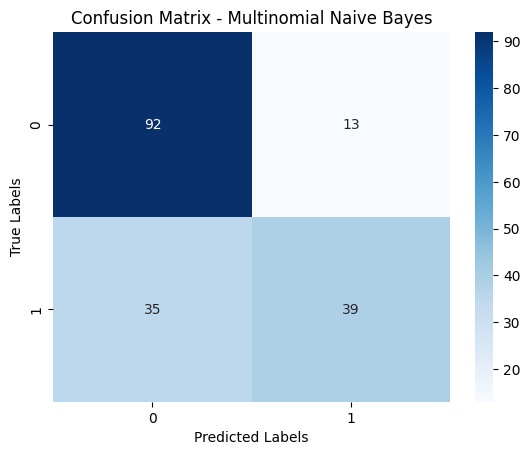

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       105
           1       0.75      0.53      0.62        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.71       179
weighted avg       0.73      0.73      0.72       179



In [ ]:
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

print(cr1)

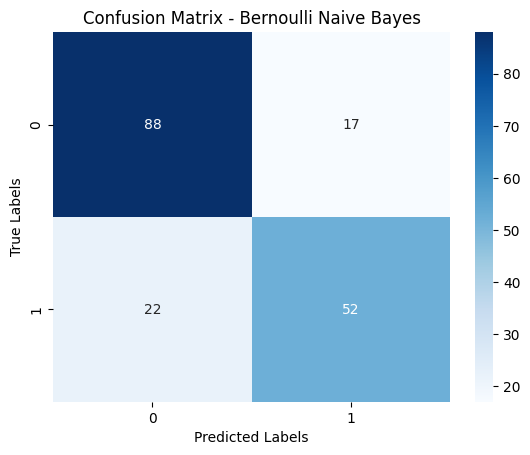

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Bernoulli Naive Bayes')
plt.show()

print(cr2)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, pred1)
accuracy2 = accuracy_score(y_test, pred2)

In [ ]:
print("Accuracy - Multinomial Naive Bayes:", accuracy1)
print("Accuracy - Bernoulli Naive Bayes:", accuracy2)

Accuracy - Multinomial Naive Bayes: 0.7318435754189944
Accuracy - Bernoulli Naive Bayes: 0.7821229050279329


## SVM

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

df3['Age'].fillna(df3['Age'].mean(), inplace=True)

In [ ]:
lb = LabelEncoder()
df3['Sex'] = lb.fit_transform(df3['Sex'].astype(str))

lb2 = LabelEncoder()
df3['Embarked'] = lb2.fit_transform(df3['Embarked'].astype(str))

In [ ]:
X = df3.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df3['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [ ]:
clf = LinearSVC(random_state=42)
clf.fit(x_train, y_train)

pred = clf.predict(x_test)

cr = classification_report(y_test, pred)

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       105
           1       0.81      0.62      0.70        74

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.78      0.78       179



In [ ]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.81564246 0.65730337 0.84269663 0.68539326 0.69101124]
Mean score: 0.7384093904965162


In [ ]:
parameters = {
    'C': [x / 100 for x in range(10, 200, 5)],
    'max_iter': [x for x in range(1000, 5000, 1000)],
    'penalty': ['l1', 'l2']
}

In [ ]:
grid_search = GridSearchCV(clf, parameters, n_jobs=-1)

# grid_search.fit(x_train, y_train)
                                           # This code is take too much time to run
# best_model = grid_search.best_estimator_

bestest_model = LinearSVC(C=0.3, max_iter=10000)
scores = cross_val_score(bestest_model, X, y, cv=kf, scoring='accuracy')

In [ ]:
bestest_model

LinearSVC(C=0.3, max_iter=10000)

In [ ]:
print("Cross-validation scores with best model:", scores)
print("Mean score with best model:", scores.mean())

accuracy = accuracy_score(y_test, pred)

Cross-validation scores with best model: [0.7877095  0.76404494 0.83146067 0.76966292 0.81460674]
Mean score with best model: 0.793496955621116


In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.7821229050279329


## DT

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

df3['Age'].fillna(df3['Age'].mean(), inplace=True)

In [ ]:
lb = LabelEncoder()
df3['Sex'] = lb.fit_transform(df3['Sex'].astype(str))

lb2 = LabelEncoder()
df3['Embarked'] = lb2.fit_transform(df3['Embarked'].astype(str))

In [ ]:
x = df3.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df3['Survived']

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
y = LabelEncoder().fit_transform(y)

clf = DecisionTreeClassifier()

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

In [ ]:
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.78212291 0.74157303 0.83707865 0.76404494 0.79213483]
Mean score: 0.7833908731404181


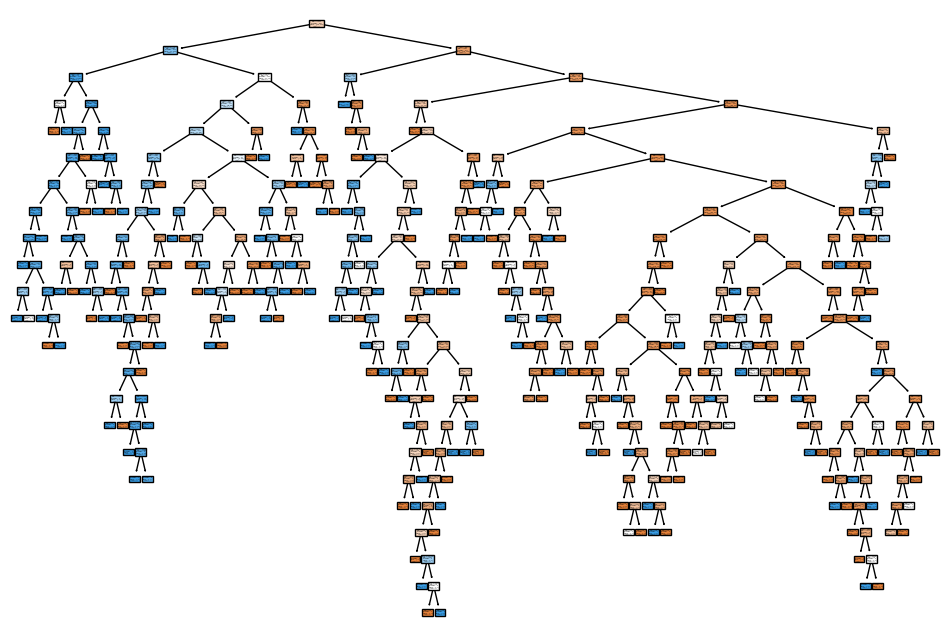

In [ ]:
clf.fit(x, y)
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=x.columns, class_names=[str(x) for x in list(lb.classes_)], filled=True)
plt.show()

In [ ]:
parameters = {
    'max_depth': [x for x in range(2, 10)]
}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(x, y)

best_model = grid_search.best_estimator_

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(best_model, x, y, cv=kf, scoring='accuracy')

In [ ]:
print("Cross-validation scores with best model:", scores)
print("Mean score with best model:", scores.mean())

Cross-validation scores with best model: [0.80446927 0.76966292 0.86516854 0.80898876 0.83146067]
Mean score with best model: 0.8159500345238841


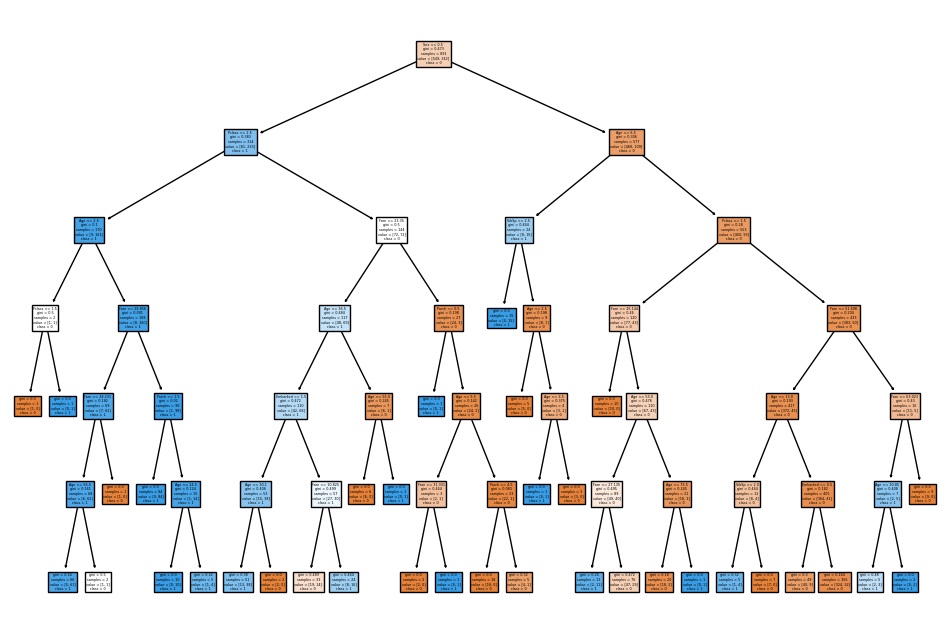

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(best_model, feature_names=x.columns, class_names=[str(x) for x in list(lb.classes_)], filled=True)
plt.show()

In [ ]:
print("DT Best Accuracy:", best_model.score(x, y))

DT Best Accuracy: 0.8653198653198653
